In [1]:
#STEP ONE : IMPORTS

In [45]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, TimeDistributed, RepeatVector, InputLayer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import plot_model


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.utils import to_categorical



In [3]:
#STEP 2 : FILE READING AND DATA COLLECTION.

In [2]:
english_french = pd.read_csv('C:/Users/user/Desktop/AI and Data Science Workshop/MyNLPModel/data/eng_-french.csv')
english_french = english_french.sample(4000)
english_french.head()

,English words/sentences,French words/sentences
113053,Your father seems very friendly.,Ton père semble être très amical.
131231,They were abandoned by their mother.,Ils ont été abandonnés par leur mère.
77184,It happened quite recently.,C'est arrivé tout récemment.
130672,Refugees in Africa are seeking help.,Les réfugiés en Afrique recherchent de l'aide.
10786,I felt the same.,J'ai ressenti la même chose.


In [5]:
#STEP 3 : MAKING THE WORDS LOWERCASE

In [3]:
english_french['French words/sentences'] = english_french['French words/sentences'].str.lower()
english_french['English words/sentences'] = english_french['English words/sentences'].str.lower()

In [4]:
english_french.shape

(4000, 2)

In [5]:
#STEP 4 : TOKENIZING THE DATA

In [6]:
english_tokenizer = Tokenizer()
french_tokenizer = Tokenizer()

In [ ]:
#STEP 5 : TOKENIZING THE DATA AND PRINTING OUT WORD INDEXES

In [54]:
english_tokenizer.fit_on_texts(english_french['English words/sentences'])
french_tokenizer.fit_on_texts(english_french['French words/sentences'])

english_word_index = english_tokenizer.word_index
french_word_index = french_tokenizer.word_index

print("English Word Index:", english_word_index)
print("French Word Index: ", french_word_index)

English Word Index: {'i': 1, 'you': 2, 'to': 3, 'the': 4, 'a': 5, 'is': 6, 'tom': 7, 'that': 8, 'of': 9, 'he': 10, 'have': 11, 'this': 12, "don't": 13, 'in': 14, 'me': 15, 'do': 16, 'it': 17, 'for': 18, 'was': 19, 'are': 20, 'your': 21, 'we': 22, 'my': 23, "i'm": 24, 'be': 25, 'what': 26, 'not': 27, 'she': 28, 'know': 29, 'want': 30, 'can': 31, 'on': 32, 'like': 33, 'with': 34, 'go': 35, 'how': 36, 'think': 37, "you're": 38, 'they': 39, 'his': 40, "it's": 41, 'about': 42, 'him': 43, "can't": 44, 'all': 45, 'were': 46, 'here': 47, 'and': 48, 'her': 49, 'time': 50, 'very': 51, 'at': 52, 'as': 53, 'did': 54, "didn't": 55, 'get': 56, 'will': 57, 'no': 58, 'has': 59, 'out': 60, 'going': 61, 'had': 62, 'if': 63, 'help': 64, 'there': 65, 'why': 66, 'one': 67, 'need': 68, 'just': 69, 'an': 70, 'come': 71, 'good': 72, 'see': 73, 'so': 74, 'up': 75, 'now': 76, 'from': 77, 'by': 78, 'would': 79, 'where': 80, "that's": 81, 'been': 82, "i'll": 83, 'please': 84, 'tell': 85, 'mary': 86, 'take': 87, "

In [8]:
#STEP 5 : CONVERTING SENTENCES TO SEQUENCES.

In [9]:
X = english_tokenizer.texts_to_sequences(english_french['English words/sentences'])
y = french_tokenizer.texts_to_sequences(english_french['French words/sentences'])
english_french.head()

,English words/sentences,French words/sentences
113053,your father seems very friendly.,ton père semble être très amical.
131231,they were abandoned by their mother.,ils ont été abandonnés par leur mère.
77184,it happened quite recently.,c'est arrivé tout récemment.
130672,refugees in africa are seeking help.,les réfugiés en afrique recherchent de l'aide.
10786,i felt the same.,j'ai ressenti la même chose.


In [10]:
print("English sequences sample:", X[:5])
print("French sequences sample:", y[:5])

English sequences sample: [[21, 179, 388, 51, 977], [39, 46, 1432, 78, 245, 231], [17, 153, 256, 619], [978, 14, 1433, 20, 1434, 64], [1, 468, 4, 257]]
French sequences sample: [[76, 147, 320, 46, 60, 1096], [52, 80, 77, 1764, 78, 228, 204], [25, 192, 35, 842], [20, 1097, 21, 1765, 1098, 2, 428], [22, 1766, 8, 99, 81]]


In [11]:
max_eng_len = max(len(seq) for seq in X)
max_fr_len = max(len(seq) for seq in y)

In [15]:
#STEP 6 : PAD SEQUENCES.

In [12]:
X_padded = pad_sequences(X, maxlen=max_eng_len, padding='post')
y_padded = pad_sequences(y, maxlen=max_fr_len, padding='post')

# Print shapes
print("Max length of English sequences:", max_eng_len)
print("Max length of French sequences:", max_fr_len)
print("Shape of X_padded:", X_padded.shape)
print("Shape of y_padded:", y_padded.shape)

Max length of English sequences: 25
Max length of French sequences: 28
Shape of X_padded: (4000, 25)
Shape of y_padded: (4000, 28)


In [13]:
#STEP 12 : DEFINING THE PRE-PROCESS_INPUT FUNCTION

In [14]:
def preprocess_input(sentence, english_tokenizer, max_eng_len):
    tokens = sentence.lower().split()
    token_ids = [english_tokenizer.word_index.get(word, 0) for word in tokens]
    padded_token_ids = pad_sequences([token_ids], maxlen=max_eng_len, padding='post')
    return padded_token_ids

In [19]:
# Print shapes after padding
print("English padded shape:", X_padded.shape)
print("French padded shape:", y_padded.shape)

English padded shape: (4000, 32)
French padded shape: (4000, 31)


In [20]:
#STEP 10 : TRAINING THE MODEL

In [39]:
y_padded_categorical = to_categorical(y_padded, num_classes=len(french_tokenizer.word_index) + 1)

model = Sequential()
model.add(InputLayer(input_shape=(max_eng_len,)))
model.add(Embedding(input_dim=len(english_tokenizer.word_index) + 1, output_dim=128))
model.add(LSTM(128))
model.add(RepeatVector(max_fr_len))
model.add(LSTM(128, return_sequences=True))
model.add(TimeDistributed(Dense(len(french_tokenizer.word_index) + 1, activation='softmax')))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_padded, y_padded_categorical, batch_size=64, epochs=20, validation_split=0.2)



c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 482ms/step - accuracy: 0.6932 - loss: 6.0696 - val_accuracy: 0.7617 - val_loss: 2.0616
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 441ms/step - accuracy: 0.7575 - loss: 2.0343 - val_accuracy: 0.7617 - val_loss: 1.8814
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 402ms/step - accuracy: 0.7581 - loss: 1.8425 - val_accuracy: 0.7617 - val_loss: 1.7842
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 398ms/step - accuracy: 0.7590 - loss: 1.7726 - val_accuracy: 0.7617 - val_loss: 1.7641
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 401ms/step - accuracy: 0.7591 - loss: 1.7378 - val_accuracy: 0.7697 - val_loss: 1.7519
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 396ms/step - accuracy: 0.7665 - loss: 1.7247 - val_accuracy: 0.7699 - val_loss: 1.7413
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 401ms/step - accuracy: 0.7654 - loss: 1.7060 - val_accuracy: 0.7699 - val_loss: 1.7298
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 395ms/step - accuracy: 0.7654 - loss: 1.6971 - val_accu

In [23]:
#STEP 13 : DEFINING THE DECODE_SEQUENCE FUNCTION

In [40]:
def decode_sequence(prediction, tokenizer):
    translated_sentence = []
    
    for word_prob in prediction:
        word_id = np.argmax(word_prob)
        if word_id == 0:
            break
        translated_sentence.append(tokenizer.index_word[word_id])
    
    return ' '.join(translated_sentence)


In [53]:
# STEP 14 : TRANSLATE USER INPUT

In [41]:
def translate_user_input(user_input, model, english_tokenizer, french_tokenizer, max_eng_len, max_fr_len):
    # Tokenize and pad the input sequence
    input_seq = english_tokenizer.texts_to_sequences([user_input])
    input_seq = pad_sequences(input_seq, maxlen=max_eng_len, padding='post')

    # Predict the translation
    prediction = model.predict(input_seq)

    # Decode the prediction to get the translated sentence
    translated_sentence = decode_sequence(prediction[0], french_tokenizer)
    
    return translated_sentence

In [27]:
#STEP 11 : CHECKING THE DATA

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 25, 128)        │       380,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 28, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 28, 4398)       │       567,342 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,633,548 (13.86 MB)

 Trainable params: 1,211,182 (4.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,422,366 (9.24 MB)

In [56]:
model.layers

[<Embedding name=embedding_2, built=True>,
 <LSTM name=lstm_4, built=True>,
 <RepeatVector name=repeat_vector_2, built=True>,
 <LSTM name=lstm_5, built=True>,
 <TimeDistributed name=time_distributed_2, built=True>]

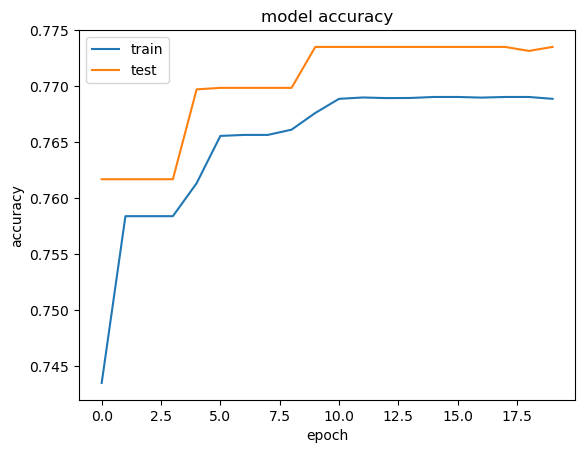

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

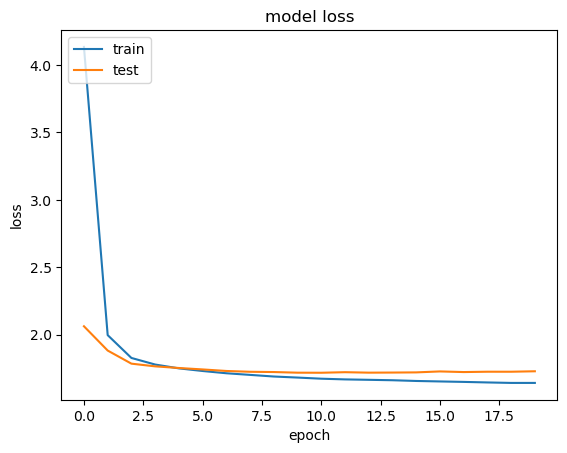

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
#STEP 15 : RUNNING THE MODEL

In [48]:
user_input = input("Enter an English sentence to translate: ")
translated_sentence = translate_user_input(user_input, model, english_tokenizer, french_tokenizer, max_eng_len, max_fr_len)
print(f"Translated to French: {translated_sentence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Translated to French: je ne pas
